In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

(9993, 6, 6)
(9993,)


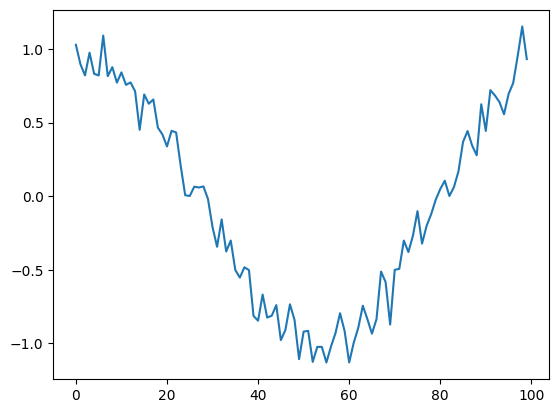

In [5]:
N = 10000
data = np.array([np.cos(x/17) for x in range(N)]) + 0.1*np.random.randn(N)
plt.plot(data[:100])


off = 3
length = off*2+1
X = np.array([ np.diag(np.hstack((data[i:i+off], data[i+off+1:i+length]))) for i in range(N-length)])
Y = data[off:N-off-1]
print(X.shape, Y.shape, sep='\n')

In [6]:
model = Sequential()
model.add(Input((length-1, length-1)))
model.add( Bidirectional(GRU(2)) )
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mean_squared_error', optimizer=Adam(0.01))


history = model.fit(X, Y, batch_size=32, epochs=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 4)                 120       
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 125 (500.00 Byte)
Trainable params: 125 (500.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 3s 2ms/step - loss: 0.0313
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0129
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0127
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0126
Epoch 5/10
313/313 [==

1/1 [==============================] - 0s 13ms/step


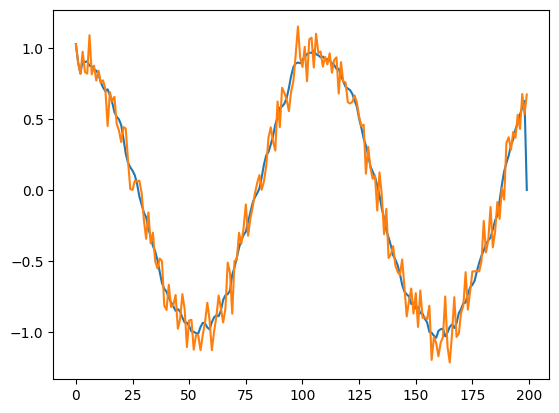

In [7]:
M = 200
XX = np.zeros(M)
XX[:off] = data[:off]
for i in range(M-off-1):
  x = np.diag( np.hstack( (XX[i:i+off], data[i+off+1:i+length])) )
  x = np.expand_dims(x, axis=0)
  y = model.predict(x)
  XX[i+off] = y

plt.plot(XX[:M])
plt.plot(data[:M])